<a href="https://colab.research.google.com/github/Osterne/codes_book/blob/main/05_mod_01_ap_sup_regressao_03_linear_multivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

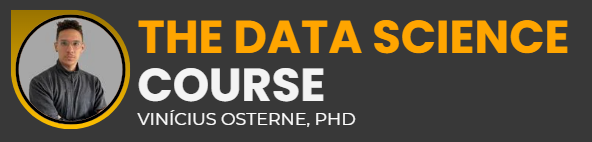

---

# Aprendizado Supervisionado - Modelos Baseados em Regressão

### Modelo de Regressão Linear Multivariada

---

# Roteiro

- Conceituação

- Aplicação Prática

# Conceituação

## Motivação
- Modelo usado para **relacionar várias variáveis resposta quantitativas** com um conjunto de variáveis preditoras.
- Objetivo: prever **mais de uma variável dependente** simultaneamente e analisar como os preditores influenciam o **conjunto** de respostas.
- Adequado quando as variáveis resposta são **correlacionadas** entre si e queremos aproveitar essa estrutura para melhorar a análise e a inferência.
- Exemplo: prever simultaneamente **pressão arterial sistólica** e **pressão arterial diastólica** a partir de idade, peso e nível de atividade física.

## Estrutura do Modelo

$$
\mathbf{Y}_i = \boldsymbol{\beta}_0 + \mathbf{B}^\top \mathbf{X}_i + \boldsymbol{\varepsilon}_i
$$

- **$\mathbf{Y}_i$**: vetor $(q \times 1)$ com as $q$ variáveis resposta para a i-ésima observação.
- **$\mathbf{X}_i$**: vetor $(p \times 1)$ com os preditores da i-ésima observação.
- **$\boldsymbol{\beta}_0$**: vetor $(q \times 1)$ de interceptos.
- **$\mathbf{B}$**: matriz $(p \times q)$ de coeficientes, onde cada coluna corresponde a uma resposta.
- **$\boldsymbol{\varepsilon}_i$**: vetor de erros aleatórios $(q \times 1)$, com média zero e matriz de covariância $\boldsymbol{\Sigma}$.

Se tivermos $q = 2$ respostas e $p = 2$ preditores, o modelo acima pode ser escrito como:

$$
\begin{cases}
Y_{1i} = \beta_{0,1} + \beta_{1,1} X_{i1} + \beta_{2,1} X_{i2} + \varepsilon_{1i} \\
Y_{2i} = \beta_{0,2} + \beta_{1,2} X_{i1} + \beta_{2,2} X_{i2} + \varepsilon_{2i}
\end{cases}
$$

Ou, em forma matricial expandida:

$$
\begin{bmatrix}
Y_{1i} \\
Y_{2i}
\end{bmatrix}
=
\begin{bmatrix}
\beta_{0,1} \\
\beta_{0,2}
\end{bmatrix}
+
\begin{bmatrix}
\beta_{1,1} & \beta_{2,1} \\
\beta_{1,2} & \beta_{2,2}
\end{bmatrix}^\top
\begin{bmatrix}
X_{i1} \\
X_{i2}
\end{bmatrix}
+
\begin{bmatrix}
\varepsilon_{1i} \\
\varepsilon_{2i}
\end{bmatrix}
$$


💡 **Interpretação:**  
Cada equação representa uma **regressão linear múltipla** para uma resposta diferente, mas os resíduos $\varepsilon_{1i}$ e $\varepsilon_{2i}$ podem estar correlacionados — por isso modelamos tudo junto.


## Suposições
- **Linearidade**: relação linear entre cada variável resposta e os preditores.
- **Independência dos erros**: vetores de resíduos independentes entre observações.
- **Homoscedasticidade multivariada**: a matriz de covariância $\boldsymbol{\Sigma}$ é constante para todas as observações.
- **Normalidade multivariada dos erros**:
$$
\boldsymbol{\varepsilon}_i \sim N_q(\mathbf{0}, \boldsymbol{\Sigma})
$$
- **Ausência de multicolinearidade severa** entre preditores.

## Estimação dos Parâmetros

- No modelo multivariado, usamos o método de **Mínimos Quadrados Ordinários (MQO)** para estimar todos os coeficientes simultaneamente.  
- **Objetivo:** encontrar a matriz de coeficientes **B** que **minimiza a soma dos quadrados** dos resíduos, considerando **todas as variáveis resposta juntas**.  

- Em notação matricial, o modelo é escrito como:  

  $$
  \mathbf{Y} = \mathbf{X} \mathbf{B} + \mathbf{E}
  $$

  - **$\mathbf{Y}$**: matriz $(n \times q)$ com $n$ observações e $q$ respostas (cada coluna é uma resposta).  
  - **$\mathbf{X}$**: matriz $(n \times p)$ com os preditores (inclui coluna de 1’s para o intercepto).  
  - **$\mathbf{B}$**: matriz $(p \times q)$ de coeficientes (cada coluna → uma resposta, cada linha → um preditor).  
  - **$\mathbf{E}$**: matriz $(n \times q)$ de resíduos (valores observados menos valores ajustados).  

- Formalmente, queremos resolver o problema de otimização:  

  $$
  \min_{\mathbf{B}} \; \|\mathbf{E}\|_F^2
  $$

  onde $\|\mathbf{E}\|_F^2 = \sum_{i=1}^n \sum_{k=1}^q e_{ik}^2$ é a **norma de Frobenius ao quadrado** da matriz de resíduos.  

- Substituindo $\mathbf{E}$:  

  $$
  \min_{\mathbf{B}} \; \|\mathbf{Y} - \mathbf{X} \mathbf{B}\|_F^2
  $$

- De forma expandida:  

  $$
  \min_{\mathbf{B}} \; \sum_{i=1}^n \sum_{k=1}^q \left( y_{ik} - \sum_{j=1}^p x_{ij} \beta_{jk} \right)^2
  $$

- O estimador de MQO multivariado que resolve esse problema é:  

  $$
  \hat{\mathbf{B}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}
  $$

- **Notação aberta:**  
  - A matriz $\hat{\mathbf{B}}$ é formada por blocos onde **cada coluna** contém os coeficientes de uma equação (uma para cada resposta) e **cada linha** corresponde a um preditor.  
  - Exemplo para $q=2$ respostas e $p=3$ preditores (Intercepto, $X_1$, $X_2$):

$$\hat{\mathbf{B}} =
\begin{bmatrix}
\hat{\beta}_{0,1} & \hat{\beta}_{0,2} \\
\hat{\beta}_{1,1} & \hat{\beta}_{1,2} \\
\hat{\beta}_{2,1} & \hat{\beta}_{2,2}
\end{bmatrix}$$

O que equivale a:

$$
\begin{cases}
\hat{Y}_1 = \hat{\beta}_{0,1} + \hat{\beta}_{1,1} X_1 + \hat{\beta}_{2,1} X_2 \\
\hat{Y}_2 = \hat{\beta}_{0,2} + \hat{\beta}_{1,2} X_1 + \hat{\beta}_{2,2} X_2
\end{cases}
$$

- **Passos intuitivos:**
  - Multiplicamos $\mathbf{X}^\top$ por $\mathbf{X}$ e invertemos para capturar as relações entre preditores.  
  - Multiplicamos o resultado por $\mathbf{X}^\top \mathbf{Y}$ para incorporar as relações com as respostas.  
  - O resultado é a matriz $\hat{\mathbf{B}}$ com todos os coeficientes ajustados ao mesmo tempo.  

- **Interpretação:**
  - Cada elemento $\hat{\beta}_{jk}$ mostra o efeito do preditor $j$ sobre a resposta $k$.  
  - A estimação considera a correlação entre respostas para obter resultados mais eficientes do que rodar regressões separadas.




## Inferência
- **Teste de significância global** (hipótese de que nenhum preditor afeta nenhuma resposta) é feito via testes multivariados:
  - Wilks' Lambda
  - Pillai's Trace
  - Hotelling–Lawley Trace
  - Roy's Greatest Root
- Testes univariados podem ser aplicados a cada resposta individualmente, mas a análise conjunta é mais poderosa quando as respostas são correlacionadas.

## Interpretação dos Parâmetros
- Cada coluna de $\hat{\mathbf{B}}$ contém os coeficientes associados a uma variável resposta específica.
- $\hat{\beta}_{jk}$ representa a variação esperada na $k$-ésima variável resposta para um aumento de 1 unidade no preditor $X_j$, mantendo os outros constantes.

## Diagnóstico
- **Análise de resíduos multivariados**: verificação de normalidade multivariada (teste de Mardia, gráficos QQ multivariados).
- **Homogeneidade da covariância**: teste de Box’s M.
- **Multicolinearidade**: análise de VIF nos preditores.
- **Observações influentes**: distância de Cook e leverage multivariados.
- **Ajuste global**: $R^2$ multivariado e medidas associadas.


---

# Aplicação

In [20]:
# Passo a passo da análise
## 1. Pacotes necessários
## 2. Descrição dos dados (onde conseguir e sobre o que se tratam)
## 3. Análise descritiva
## 4. Ajuste do modelo
## 5. Avaliação/Diagnóstico do modelo

## 1. Pacotes necessários
Usaremos:
- `numpy`, `pandas` para manipulação de dados
- `matplotlib` para gráficos
- `scikit-learn` para regressão linear multissaída (previsão)
- `statsmodels` (MANOVA) para **testes multivariados** de significância conjunta


In [32]:
# 1) Pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

pd.set_option("display.float_format", lambda x: f"{x:,.4f}")

## 2. Descrição dos dados (onde conseguir e sobre o que se tratam)

**Base Iris (Fisher, 1936)** — disponível no `scikit-learn` (`load_iris`):
- 150 observações de flores Iris de 3 espécies.
- Variáveis numéricas (em cm):
  - `sepal_length`, `sepal_width`, `petal_length`, `petal_width`.
- Usaremos:
  - **Respostas:** `sepal_length`, `petal_length`
  - **Preditores:** `sepal_width`, `petal_width`

**Onde conseguir:** diretamente pelo `sklearn.datasets.load_iris(as_frame=True)`.


In [22]:
# 2) Carregamento e organização dos dados
iris = load_iris(as_frame=True)
df = iris.frame.rename(columns={
    "sepal length (cm)": "sepal_length",
    "sepal width (cm)": "sepal_width",
    "petal length (cm)": "petal_length",
    "petal width (cm)": "petal_width",
})

# Dicionário simples de variáveis
dicionario = pd.DataFrame({
    "variavel": ["sepal_length","sepal_width","petal_length","petal_width","target"],
    "descricao": [
        "Comprimento da sépala (cm)",
        "Largura da sépala (cm)",
        "Comprimento da pétala (cm)",
        "Largura da pétala (cm)",
        "Espécie (0=setosa, 1=versicolor, 2=virginica)"
    ]
})

print("Dimensão da base:", df.shape)
display(dicionario)
display(df.head())


Dimensão da base: (150, 5)


,variavel,descricao
0,sepal_length,Comprimento da sépala (cm)
1,sepal_width,Largura da sépala (cm)
2,petal_length,Comprimento da pétala (cm)
3,petal_width,Largura da pétala (cm)
4,target,"Espécie (0=setosa, 1=versicolor, 2=virginica)"


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1000,3.5000,1.4000,0.2000,0
1,4.9000,3.0000,1.4000,0.2000,0
2,4.7000,3.2000,1.3000,0.2000,0
3,4.6000,3.1000,1.5000,0.2000,0
4,5.0000,3.6000,1.4000,0.2000,0


## 3. Análise descritiva
- **Sumário estatístico** das variáveis numéricas.
- **Correlação** entre respostas e preditores.
- **Visualização**:
  - Histogramas das variáveis numéricas.
  - Dispersão entre cada resposta e cada preditor (para avaliar tendência linear).


,sepal_length,sepal_width,petal_length,petal_width
count,150.0000,150.0000,150.0000,150.0000
mean,5.8433,3.0573,3.7580,1.1993
std,0.8281,0.4359,1.7653,0.7622
min,4.3000,2.0000,1.0000,0.1000
25%,5.1000,2.8000,1.6000,0.3000
50%,5.8000,3.0000,4.3500,1.3000
75%,6.4000,3.3000,5.1000,1.8000
max,7.9000,4.4000,6.9000,2.5000



Matriz de correlação:


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.0000,-0.1176,0.8718,0.8179
sepal_width,-0.1176,1.0000,-0.4284,-0.3661
petal_length,0.8718,-0.4284,1.0000,0.9629
petal_width,0.8179,-0.3661,0.9629,1.0000


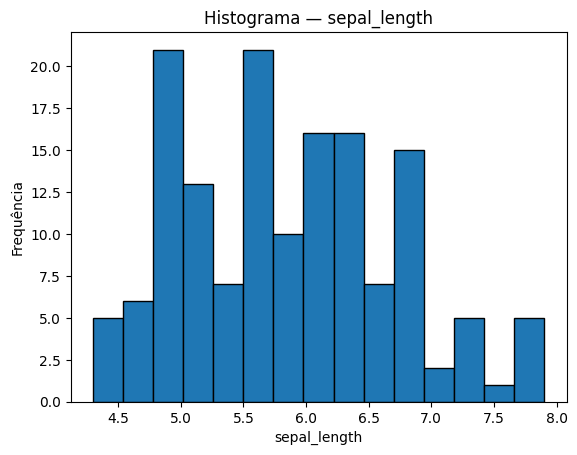

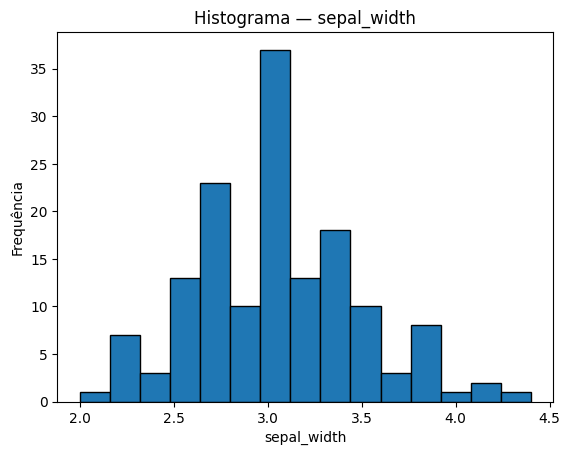

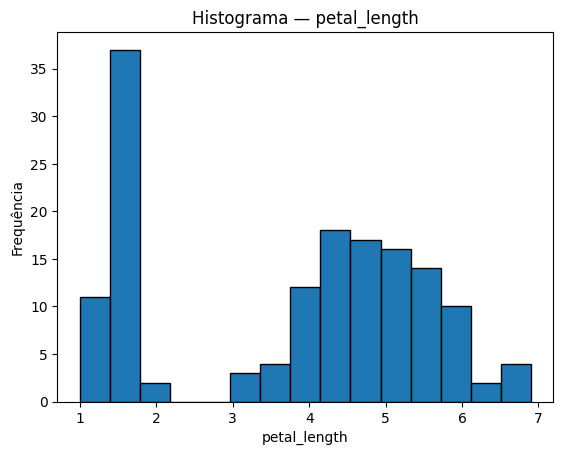

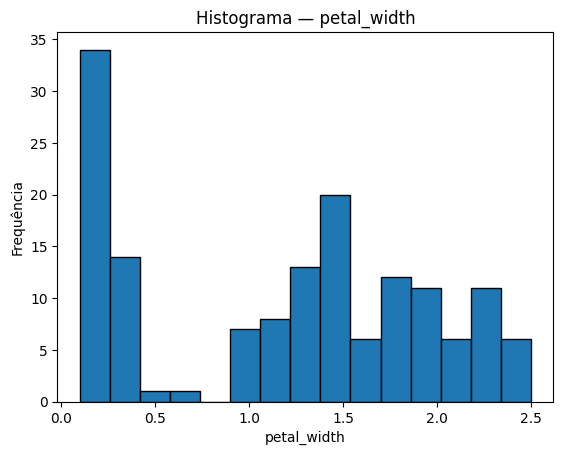

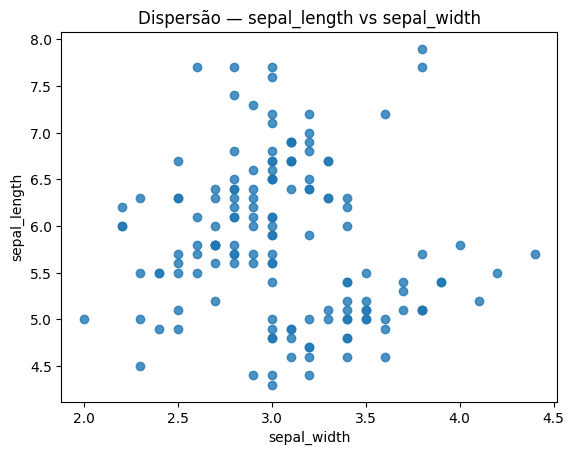

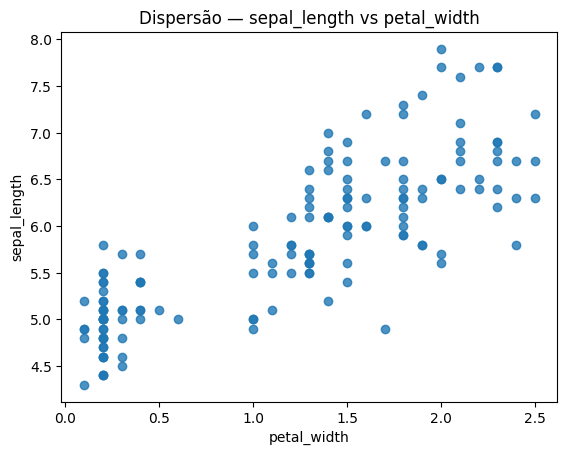

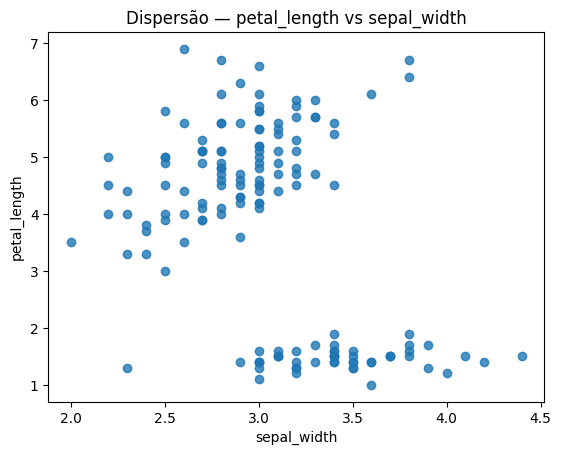

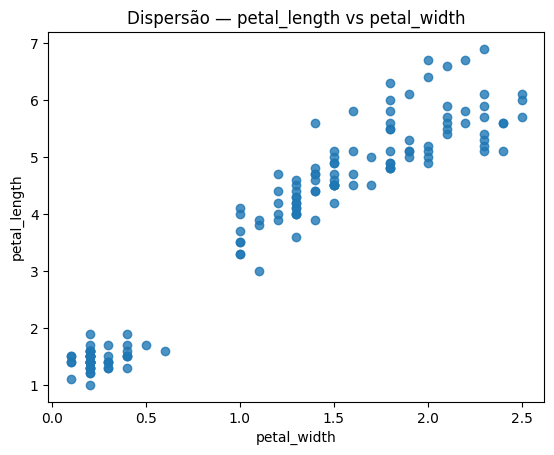

In [33]:
# 3) Sumário e correlações
num_cols = ["sepal_length","sepal_width","petal_length","petal_width"]
display(df[num_cols].describe())

corr = df[num_cols].corr()
print("\nMatriz de correlação:")
display(corr)

# Histogramas
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=15, edgecolor="black")
    plt.title(f"Histograma — {col}")
    plt.xlabel(col); plt.ylabel("Frequência")
    plt.show()

# Dispersões: cada Y (linha) vs cada X (coluna)
Y_cols = ["sepal_length","petal_length"]
X_cols = ["sepal_width","petal_width"]

for y in Y_cols:
    for x in X_cols:
        plt.figure()
        plt.scatter(df[x], df[y], alpha=0.8)
        plt.xlabel(x); plt.ylabel(y)
        plt.title(f"Dispersão — {y} vs {x}")
        plt.show()

## 4. Ajuste do modelo
Modelo **multivariado** com duas respostas:

$$
\text{sepal_length} = \beta_{0,1} + \beta_{1,1} \cdot \text{sepal_width} + \beta_{2,1} \cdot \text{petal_width} + \varepsilon_1
$$

$$
\text{petal_length} = \beta_{0,2} + \beta_{1,2} \cdot \text{sepal_width} + \beta_{2,2} \cdot \text{petal_width} + \varepsilon_2
$$

- **Previsão**: `LinearRegression` (saída múltipla).
- **Inferência conjunta**: `MANOVA` com testes **Pillai, Wilks, Hotelling–Lawley, Roy**.


In [24]:
# 4) Ajuste do modelo
Y = df[["sepal_length","petal_length"]]   # duas respostas
X = df[["sepal_width","petal_width"]]     # dois preditores

# (a) Ajuste para previsão
lin = LinearRegression()
lin.fit(X, Y)

Y_hat = pd.DataFrame(lin.predict(X), columns=Y.columns, index=X.index)
E = Y - Y_hat  # resíduos

print("Interceptos (Y1=sepal_length, Y2=petal_length):")
display(pd.Series(lin.intercept_, index=Y.columns))

print("Betas (linhas = Y, colunas = preditores):")
display(pd.DataFrame(lin.coef_, index=Y.columns, columns=X.columns))

# (b) MANOVA para inferência conjunta
df_form = pd.concat([Y, X], axis=1)
manova = MANOVA.from_formula("sepal_length + petal_length ~ sepal_width + petal_width", data=df_form)
mv_test = manova.mv_test()
print(mv_test)

#Testesmultivaraidos: H0 indica que os vetores de médias dos grupos são iguais.

Interceptos (Y1=sepal_length, Y2=petal_length):


,0
sepal_length,3.4573
petal_length,2.2582


Betas (linhas = Y, colunas = preditores):


,sepal_width,petal_width
sepal_length,0.3991,0.9721
petal_length,-0.3550,2.1556


                   Multivariate linear model
                                                               
---------------------------------------------------------------
         Intercept        Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.5375 2.0000 146.0000 62.8151 0.0000
           Pillai's trace 0.4625 2.0000 146.0000 62.8151 0.0000
   Hotelling-Lawley trace 0.8605 2.0000 146.0000 62.8151 0.0000
      Roy's greatest root 0.8605 2.0000 146.0000 62.8151 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
        sepal_width       Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.5497 2.0000 146.0000 59.8055 0.0000
           Pillai's trace 0.4503 2.0000 146.0000 59.8055 0.

In [25]:
# sepal_length = 3.4573 + 0.3991⋅sepal_width + 0.9721⋅petal_width
# petal_length = 2.2582 − 0.3550⋅sepal_width + 2.1556⋅petal_width

## 5. Avaliação/Diagnóstico do modelo

**Por resposta:**
- **Resíduos vs Ajustados** → linearidade e homocedasticidade.
- **QQ-plot** dos resíduos → normalidade marginal.
- **Métricas**: \(R^2\) e **RMSE** por resposta.

> Observação: Em análise multivariada, a suposição é sobre a **estrutura conjunta** dos erros. Aqui, olhamos diagnósticos marginais como triagem prática.


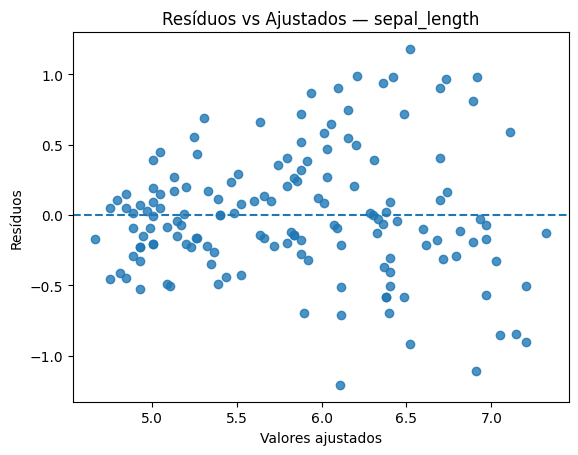

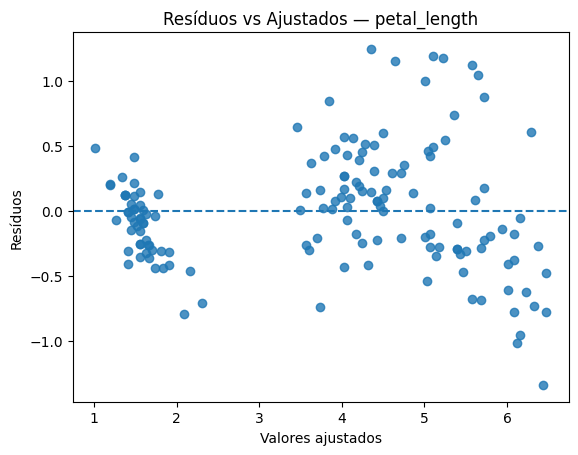

In [34]:
# Valores ajustados versus resíduos
## Objetivo: avaliar heterocedasticidade
## Comportamento esperado: nuvem sem padrão, variância aproximadamente constante
## Comportamento não esperado: formato de funil/megafone, curvaturas ou faixas
resid_dict = {}
for col in Y.columns:
    resid = Y[col] - Y_hat[col]
    resid_dict[col] = resid
    plt.figure()
    plt.scatter(Y_hat[col], resid, alpha=0.8)
    plt.axhline(0, linestyle="--")
    plt.xlabel("Valores ajustados")
    plt.ylabel("Resíduos")
    plt.title(f"Resíduos vs Ajustados — {col}")
    plt.show()

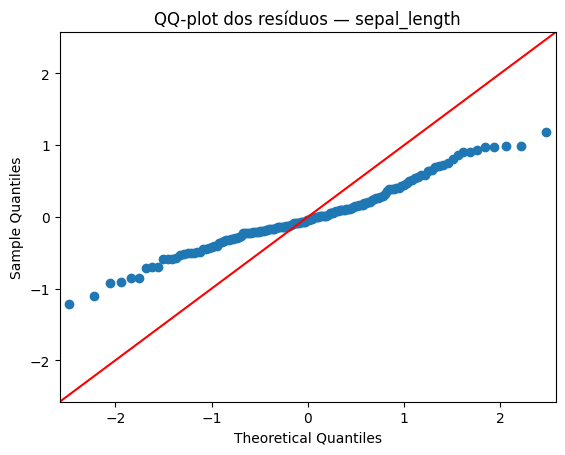

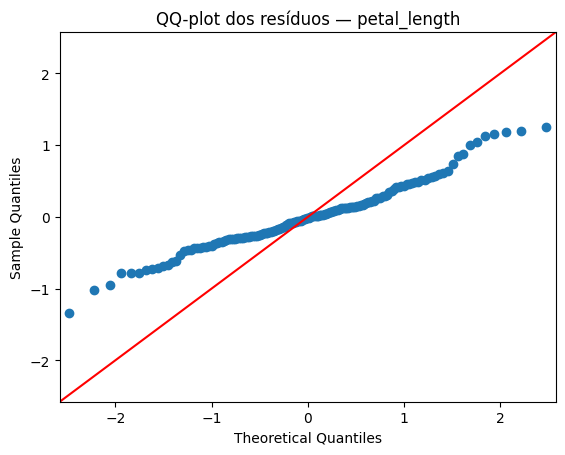

In [35]:
# QQ-plot dos resíduos
## Objetivo: avaliar normalidade dos resíduos
## Comportamento esperado: pontos próximos da linha de 45°
## Comportamento não esperado: curvatura em S (caudas pesadas), desvios fortes
for col in Y.columns:
    sm.qqplot(resid_dict[col], line="45")
    plt.title(f"QQ-plot dos resíduos — {col}")
    plt.show()

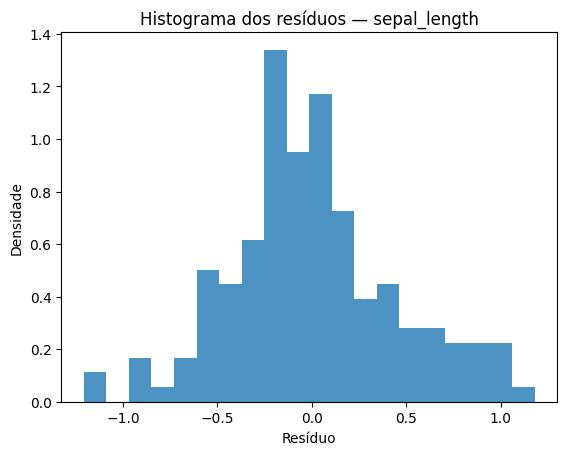

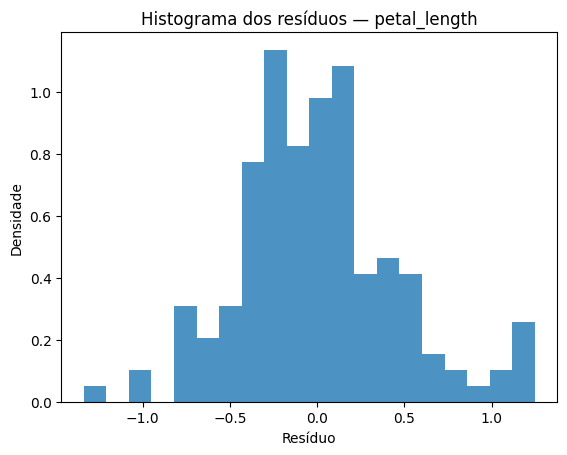

In [36]:
# Histograma dos resíduos
## Objetivo: verificar simetria e caudas como triagem de normalidade
## Comportamento esperado: distribuição aproximadamente simétrica, unimodal
## Comportamento não esperado: assimetria marcada, múltiplos picos
for col in Y.columns:
    plt.figure()
    plt.hist(resid_dict[col], bins=20, density=True, alpha=0.8)
    plt.xlabel("Resíduo")
    plt.ylabel("Densidade")
    plt.title(f"Histograma dos resíduos — {col}")
    plt.show()

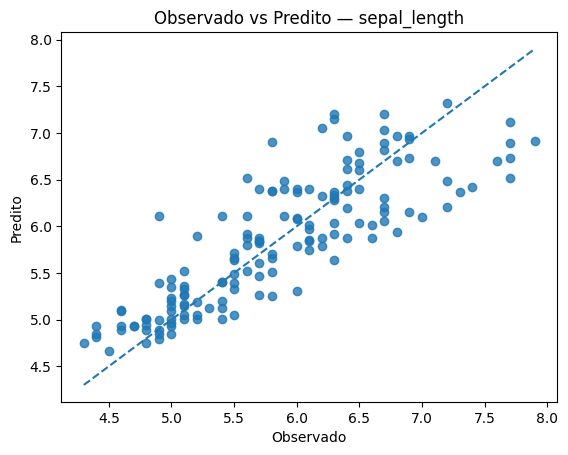

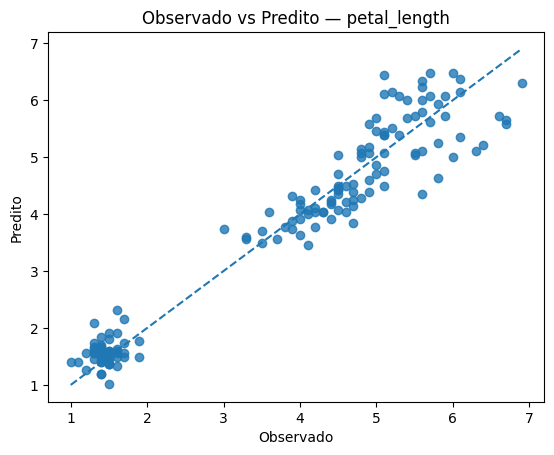

In [37]:
# Observado vs Predito (Y vs Ŷ)
## Objetivo: avaliar viés e qualidade preditiva visual
## Comportamento esperado: pontos próximos da linha 45°
## Comportamento não esperado: desvios sistemáticos, padrões curvos
for col in Y.columns:
    y_true = Y[col].values
    y_hat  = Y_hat[col].values
    y_min = np.nanmin(np.r_[y_true, y_hat])
    y_max = np.nanmax(np.r_[y_true, y_hat])
    plt.figure()
    plt.scatter(y_true, y_hat, alpha=0.8)
    plt.plot([y_min, y_max], [y_min, y_max], linestyle="--")
    plt.xlabel("Observado")
    plt.ylabel("Predito")
    plt.title(f"Observado vs Predito — {col}")
    plt.show()

In [30]:
# Erro relativo (%)
## Objetivo: avaliar magnitude dos erros em escala percentual
## Comportamento esperado: erros percentuais baixos e estáveis
## Comportamento não esperado: muitos erros altos ou outliers extremos
err_rel = {}
for col in Y.columns:
    y_true = Y[col].values
    y_hat  = Y_hat[col].values
    mask = np.abs(y_true) > 1e-12   # evita divisão por zero
    err_rel[col] = 100 * np.abs((y_true[mask] - y_hat[mask]) / y_true[mask])

err_rel_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in err_rel.items()]))

print("Resumo do erro relativo (%) por resposta:")
display(err_rel_df.describe(percentiles=[0.5, 0.9, 0.95]).T)

Resumo do erro relativo (%) por resposta:


,count,mean,std,min,50%,90%,95%,max
sepal_length,150.0000,5.7256,4.5579,0.0326,4.3567,12.4453,13.4183,24.6455
petal_length,150.0000,10.4948,9.5405,0.0005,7.9281,22.0190,27.9696,60.6359


In [38]:
# Métricas de ajuste (R² e RMSE)
## Objetivo: quantificar a qualidade do ajuste do modelo para cada resposta
## Comportamento esperado: R² alto (próximo de 1) e RMSE baixo
## Comportamento não esperado: R² muito baixo ou negativo; RMSE alto indicando erros grandes
from inspect import signature

supports_squared = "squared" in signature(mean_squared_error).parameters

metrics = []
for col in Y.columns:
    # R²: proporção da variabilidade explicada
    r2 = r2_score(Y[col], Y_hat[col])

    # RMSE: erro médio em unidades da variável resposta
    if supports_squared:
        rmse = mean_squared_error(Y[col], Y_hat[col], squared=False)
    else:
        rmse = float(np.sqrt(mean_squared_error(Y[col], Y_hat[col])))

    metrics.append({"Resposta": col, "R2": r2, "RMSE": rmse})

print("Métricas por resposta:")
display(pd.DataFrame(metrics))


Métricas por resposta:


,Resposta,R2,RMSE
0,sepal_length,0.7072,0.4466
1,petal_length,0.9338,0.4528
